_______________
<center>
  <h1 style="font-size: 40px; font-weight: bold">PRODIGY INTERNSHIP</h1>
</center>

______

<center>
  <h1 style="font-size: 30px; font-weight: bold">TASK 3: DECISION TREE CLASSIFIER</h1>
</center>


* **Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

**Intern: Aswathy S**

**Track: Data Science**

**Task Code: PRODIGY_DS_03**
_________

___________
# **LOADING LIBRARIES**
_______

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree

___________
# **LOADING DATASET**
___________

In [2]:
df = pd.read_csv(r"C:\Users\admin\Downloads\bank-additional.csv", sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df.shape

(4119, 21)

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Data cleaning

In [7]:
# Rename the target column from 'y' to 'deposit'
df.rename(columns={'y': 'deposit'}, inplace=True)
df.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [12]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [13]:
df.nunique()

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
deposit             2
dtype: int64

In [14]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64


* No missing values

In [15]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
0


* No duplicate values

In [16]:
# Check target distribution
df['deposit'].value_counts()

deposit
no     3668
yes     451
Name: count, dtype: int64

In [17]:
df['deposit'].value_counts(normalize=True) * 100

deposit
no     89.05074
yes    10.94926
Name: proportion, dtype: float64

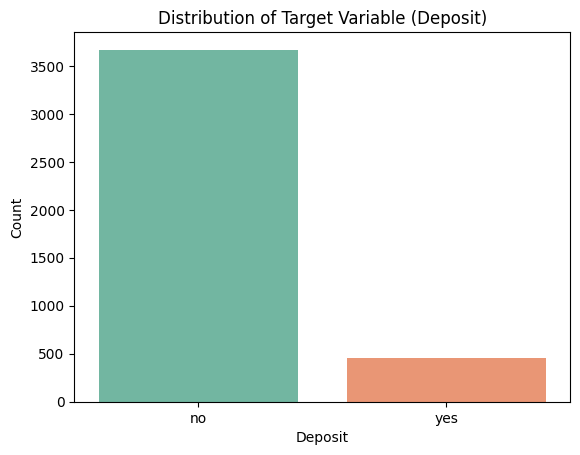

In [18]:
# Plotting the distribution of the target variable
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('Distribution of Target Variable (Deposit)')
plt.xlabel('Deposit')
plt.ylabel('Count')
plt.show()

#### Count “unknown” Values in Each Column

In [19]:
unknown_counts = {}
for col in df.columns:
    if df[col].dtype == 'object':
        count = (df[col] == 'unknown').sum()
        if count > 0:
            unknown_counts[col] = count

print(unknown_counts)

{'job': 39, 'marital': 11, 'education': 167, 'default': 803, 'housing': 105, 'loan': 105}


In [20]:
# Replace with mode
for col in ['job', 'marital', 'education', 'housing', 'loan']:
    mode_value = df.loc[df[col] != 'unknown', col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

# For 'default', replace with 'no'
df['default'] = df['default'].replace('unknown', 'no')

In [21]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed'], dtype=object)

In [23]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [24]:
df['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'illiterate'],
      dtype=object)

In [25]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

_________
## Numerical Features
___________

In [27]:
numerical_features = df.select_dtypes(include='number').columns
print("Total Numerical Features:",numerical_features.shape)
print()
print("Numeric Features:",numerical_features)

Total Numerical Features: (10,)

Numeric Features: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


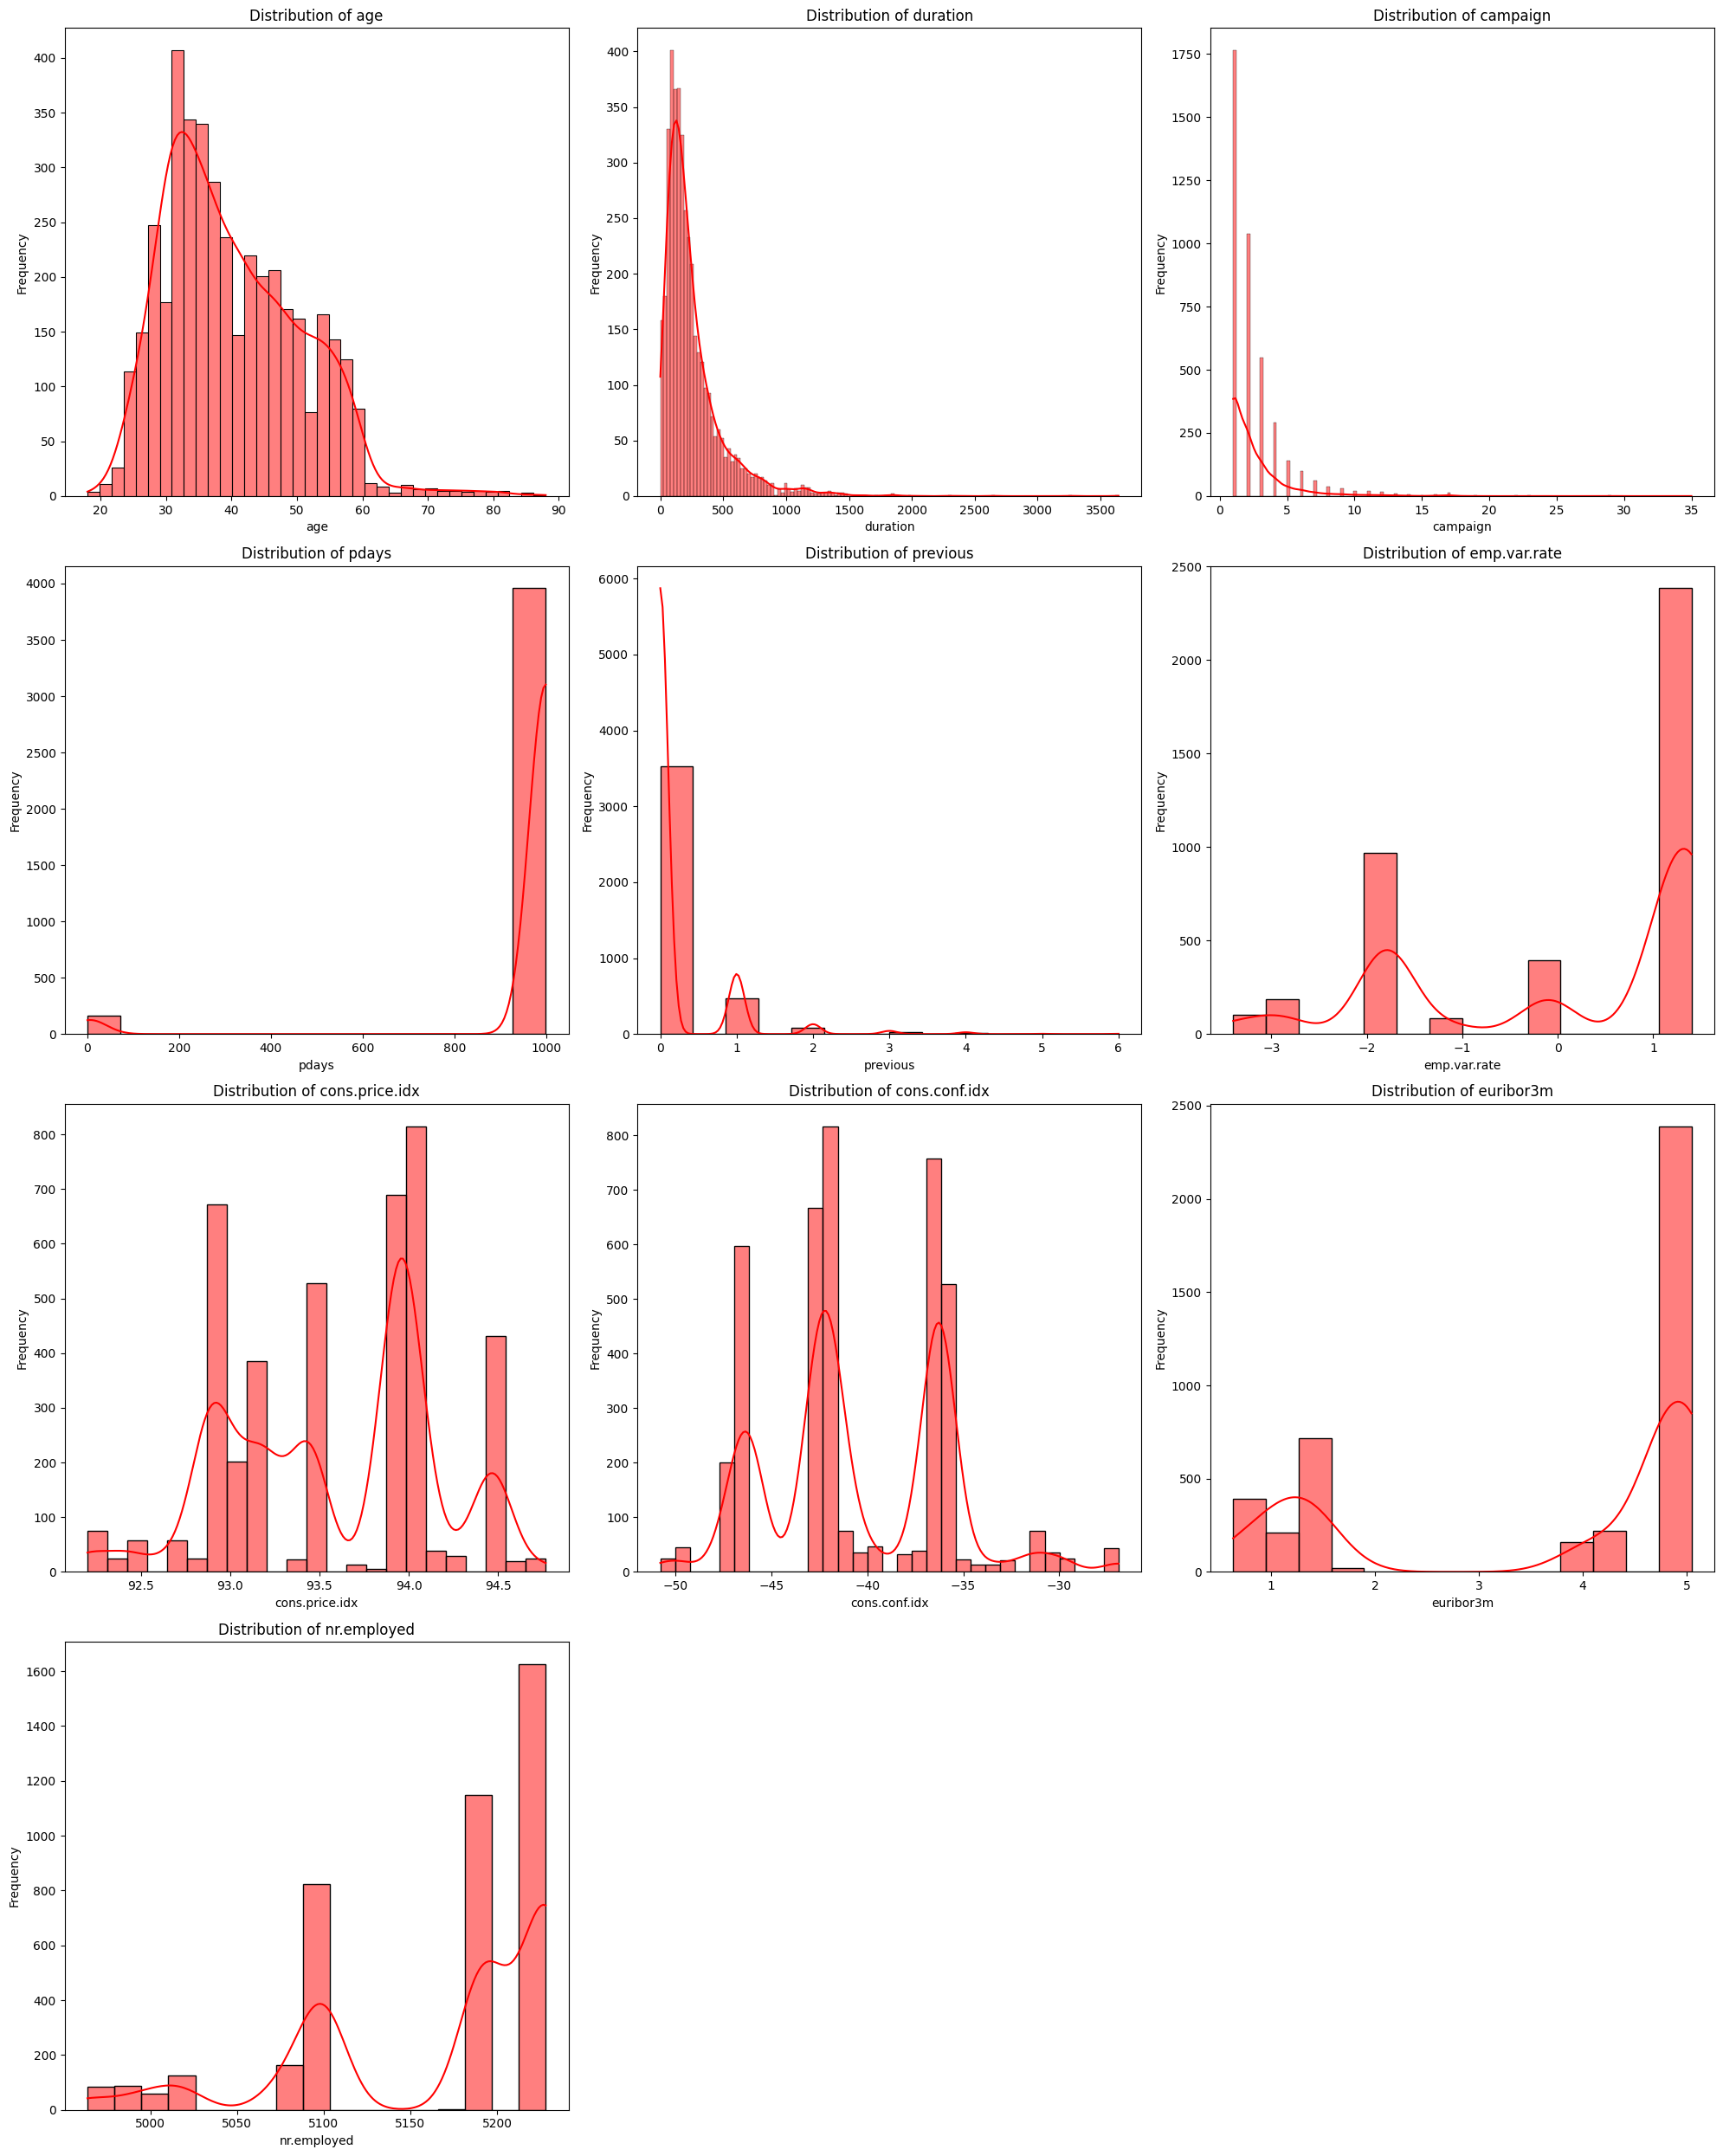

In [28]:
# Plot distributions for each numerical feature
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)  
    sns.histplot(df[col], kde=True, color='red')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
# Select numeric columns excluding the target variable
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Display the resulting DataFrame
numeric_df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8


___________
## Outlier Detection & Handling
_________

In [30]:
# Ensure deposit is in numerical_columns and remove it
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Check if 'deposit' is in the list, and remove it if present
if 'deposit' in numerical_columns:
    numerical_columns.remove('deposit')

# Display the resulting list to confirm
print("Numerical columns (excluding deposit):")
print(numerical_columns)

Numerical columns (excluding deposit):
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


_________
### Skewness before outlier handling.
_________

In [31]:
skewness = df[numerical_columns].skew().sort_values(ascending=True)
print("Skewness before outlier removal or transformation:")
print(skewness)

Skewness before outlier removal or transformation:
pdays            -4.775139
nr.employed      -1.075877
emp.var.rate     -0.727688
euribor3m        -0.715080
cons.price.idx   -0.216641
cons.conf.idx     0.287309
age               0.715694
duration          3.294781
campaign          4.003185
previous          4.022979
dtype: float64


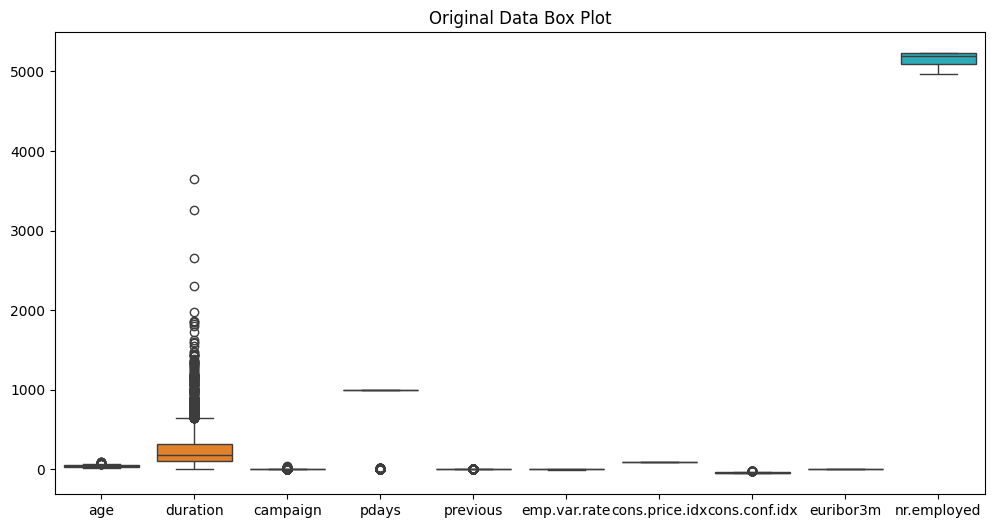

In [32]:
# Box plot for check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int']))
plt.title('Original Data Box Plot')
plt.show()

In [33]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

# Apply to all numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx', 'cons.conf.idx']
for col in numerical_columns:
    df = treat_outliers_iqr(df, col)

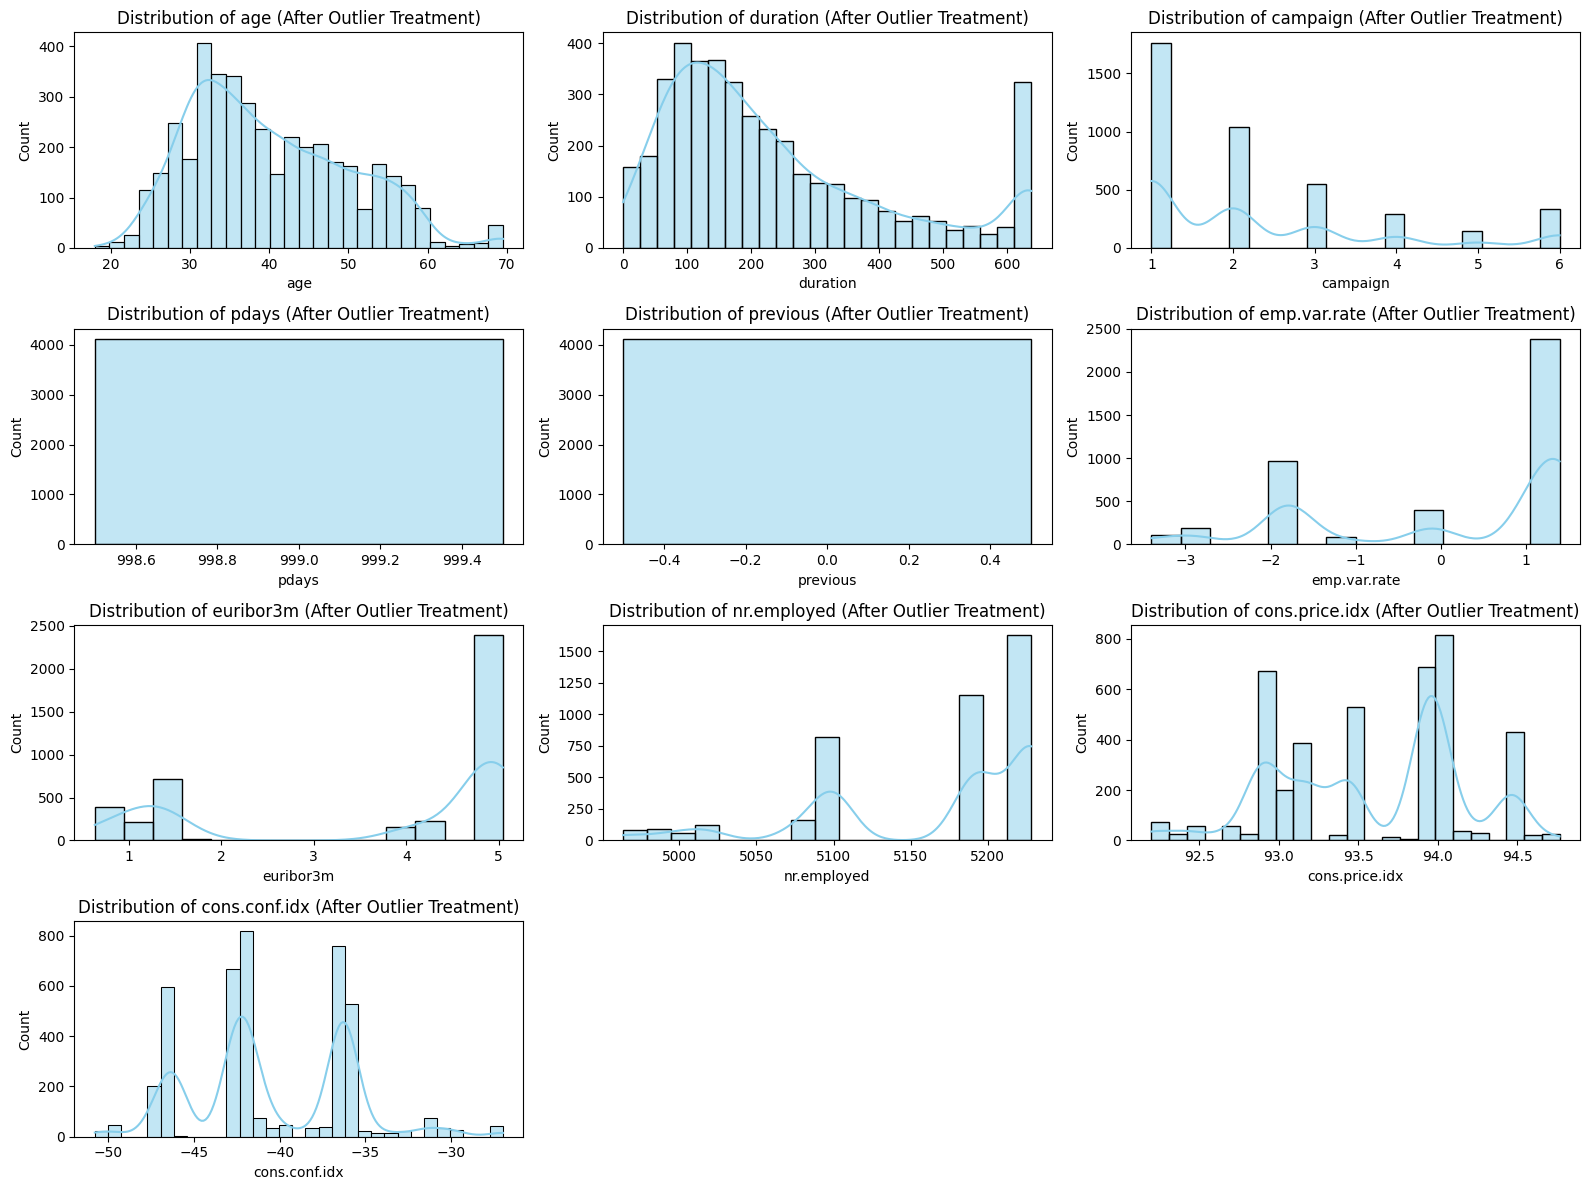

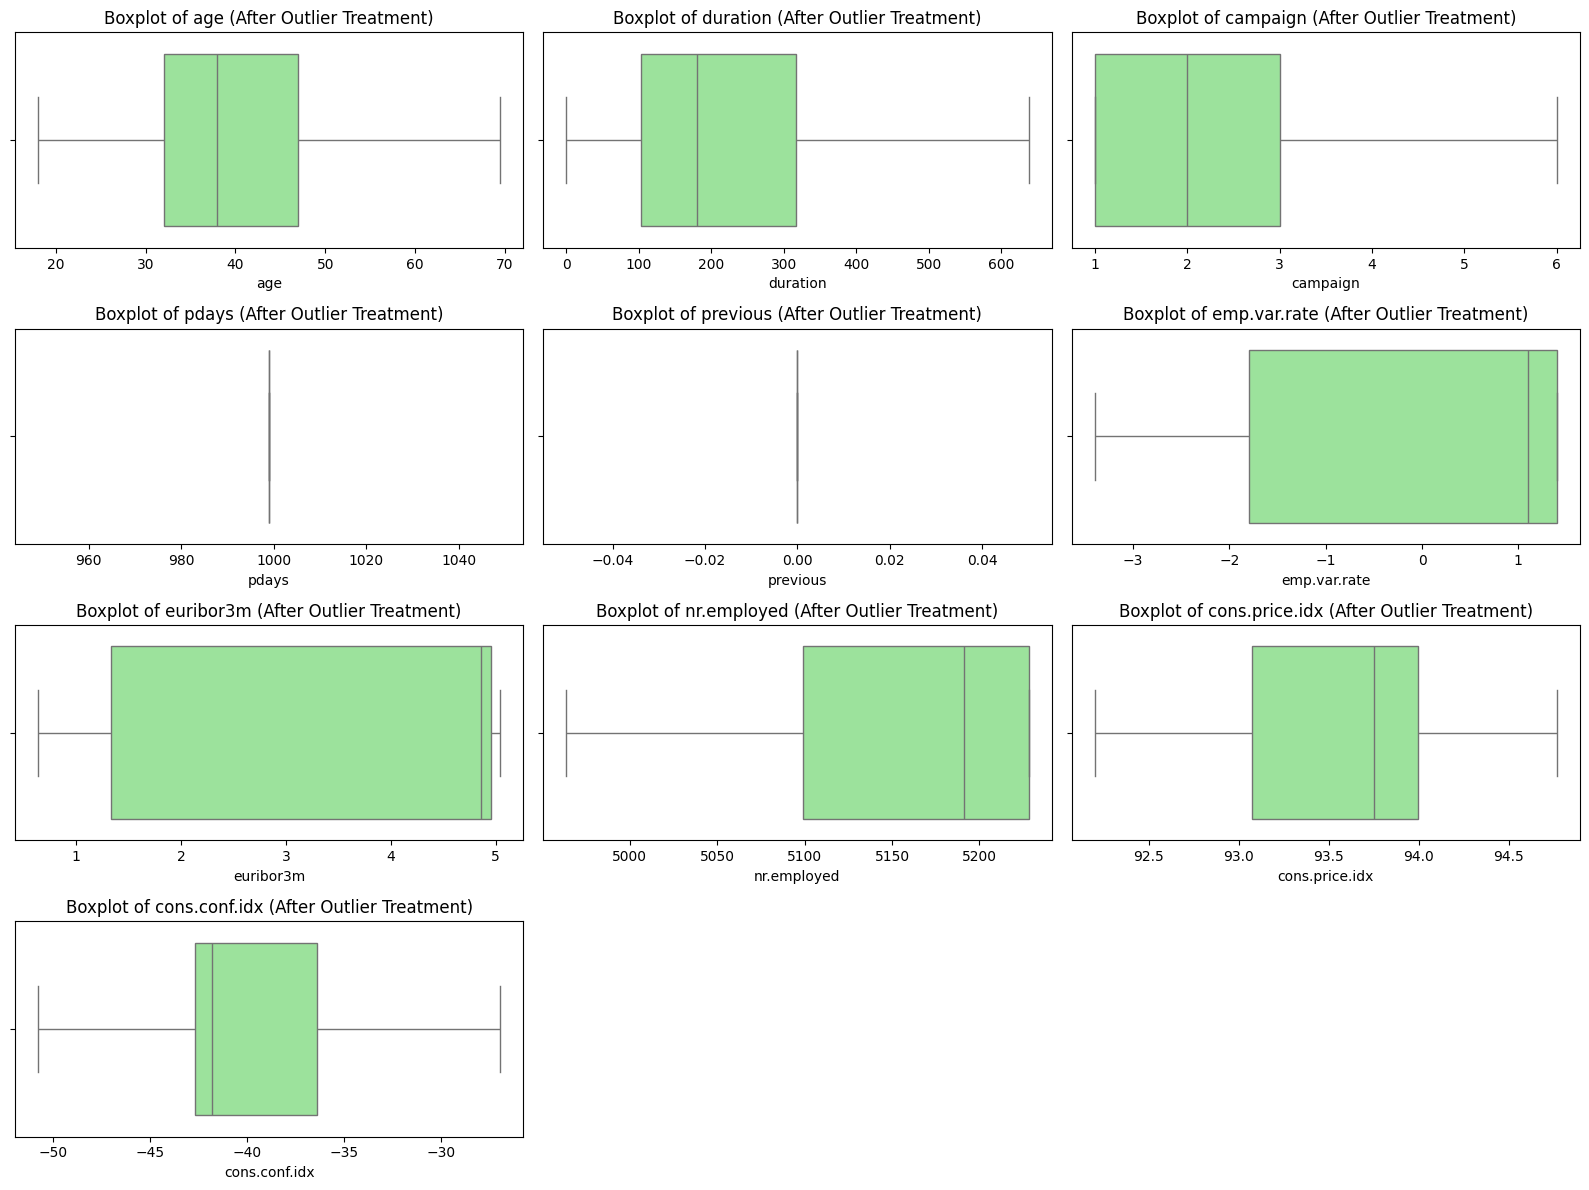

In [34]:
# List of numerical columns
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'euribor3m', 'nr.employed', 'cons.price.idx', 'cons.conf.idx']

# Plot Histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col} (After Outlier Treatment)')
plt.tight_layout()
plt.show()

# Plot Boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col} (After Outlier Treatment)')
plt.tight_layout()
plt.show()

In [35]:
# Calculate and print skewness for each column
skewness_after_outliers = df[numerical_columns].skew()

# Display skewness in a sorted manner
print("Skewness After Outlier Treatment:\n")
print(skewness_after_outliers.sort_values(ascending=False))

Skewness After Outlier Treatment:

campaign          1.205602
duration          1.040637
age               0.542348
cons.conf.idx     0.284960
pdays             0.000000
previous          0.000000
cons.price.idx   -0.216641
euribor3m        -0.715080
emp.var.rate     -0.727688
nr.employed      -1.075877
dtype: float64


In [36]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness_after_outliers[(skewness_after_outliers > 0.5) | (skewness_after_outliers < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
age             0.542348
duration        1.040637
campaign        1.205602
emp.var.rate   -0.727688
euribor3m      -0.715080
nr.employed    -1.075877
dtype: float64
6


_________
### Skewness Transformating using log
__________

In [37]:
# Make a copy of the cleaned DataFrame to avoid modifying the original
df_transformed = df.copy()

# List of highly skewed numerical features
highly_skewed_features = ['nr.employed', 'emp.var.rate', 'age', 'euribor3m', 'duration', 'campaign']

# Dictionary to store skewness values after transformation
skewness_after_transformation = {}

# Apply log1p transformation
for feature in highly_skewed_features:
    # Take absolute values first to handle negatives safely
    df_transformed[feature] = np.log1p(np.abs(df_transformed[feature]))

    # Calculate and store skewness after transformation
    skewness_after_transformation[feature] = df_transformed[feature].skew()

# Display the skewness results
for feature, skew in skewness_after_transformation.items():
    print(f"Skewness of '{feature}' after Log1p transformation: {skew:.4f}")

Skewness of 'nr.employed' after Log1p transformation: -1.0956
Skewness of 'emp.var.rate' after Log1p transformation: -1.0501
Skewness of 'age' after Log1p transformation: 0.0779
Skewness of 'euribor3m' after Log1p transformation: -0.7967
Skewness of 'duration' after Log1p transformation: -0.7688
Skewness of 'campaign' after Log1p transformation: 0.6624


* Log transformation reduces skewness and compresses large values, making data distributions more normal and helping machine learning models learn patterns more effectively.
* It also minimizes the impact of outliers and handles wide data ranges efficiently.

In [38]:
df_transformed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,3.433987,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1.098612,999.0,0.0,nonexistent,1.029619,92.893,-46.2,0.838545,8.537015,no
1,3.688879,services,single,high.school,no,no,no,telephone,may,fri,...,1.609438,999.0,0.0,nonexistent,0.741937,93.994,-36.4,1.767296,8.554874,no
2,3.258097,services,married,high.school,no,yes,no,telephone,jun,wed,...,0.693147,999.0,0.0,nonexistent,0.875469,94.465,-41.8,1.785406,8.561994,no
3,3.663562,services,married,basic.9y,no,yes,no,telephone,jun,fri,...,1.386294,999.0,0.0,nonexistent,0.875469,94.465,-41.8,1.784903,8.561994,no
4,3.871201,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0.693147,999.0,0.0,nonexistent,0.095310,93.200,-42.0,1.646926,8.555798,no


In [39]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [40]:
df_transformed.drop(columns=['pdays', 'previous'], inplace=True)

#### Why pdays, previous, and nr.employed Were Dropped:
* These features are either redundant, irrelevant, or hard to transform meaningfully.

* Dropping them simplifies the model without losing important predictive signals.

In [41]:
# Remove from the list if present
numerical_features = [col for col in numerical_features if col not in ['pdays', 'previous']]

# Now compute the correlation
correlation = df_transformed[numerical_features].corr()
print(correlation)

                     age  duration  campaign  emp.var.rate  cons.price.idx  \
age             1.000000  0.030361 -0.006629     -0.019551        0.007860   
duration        0.030361  1.000000 -0.156192      0.035546       -0.003648   
campaign       -0.006629 -0.156192  1.000000      0.010480        0.138875   
emp.var.rate   -0.019551  0.035546  0.010480      1.000000       -0.244667   
cons.price.idx  0.007860 -0.003648  0.138875     -0.244667        1.000000   
cons.conf.idx   0.089734  0.004558  0.000560      0.099337        0.046076   
euribor3m       0.016617 -0.058095  0.147299     -0.523256        0.633713   
nr.employed     0.001178 -0.075073  0.152586     -0.439218        0.468871   

                cons.conf.idx  euribor3m  nr.employed  
age                  0.089734   0.016617     0.001178  
duration             0.004558  -0.058095    -0.075073  
campaign             0.000560   0.147299     0.152586  
emp.var.rate         0.099337  -0.523256    -0.439218  
cons.price.idx   

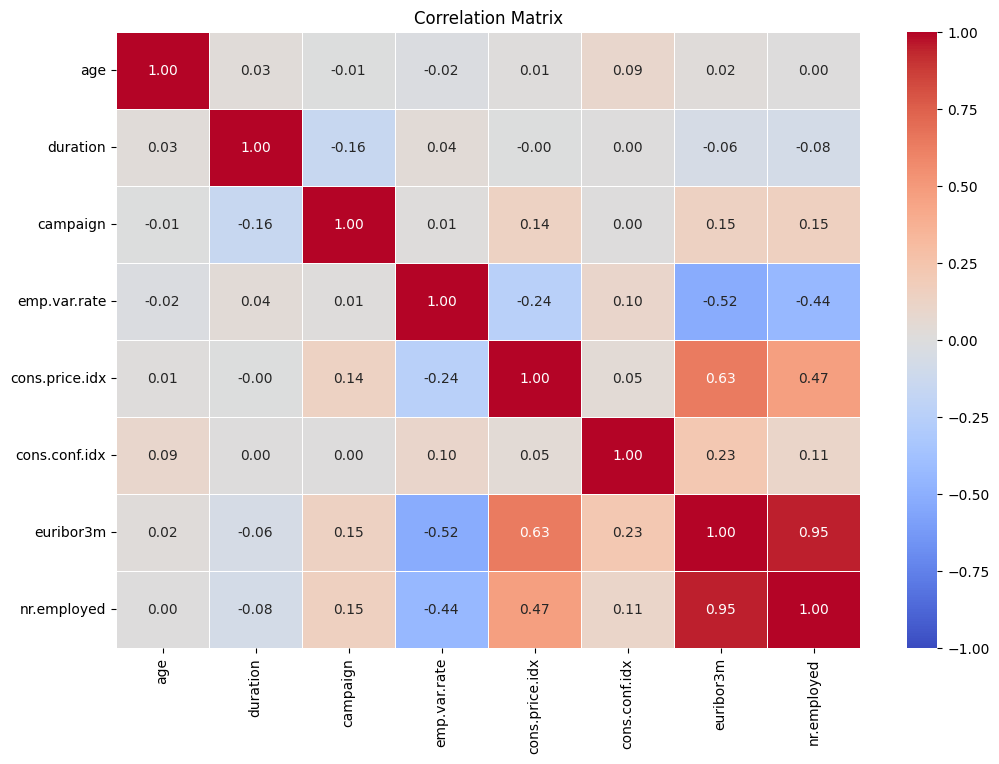

In [42]:
# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

_________
### Categorical Columns
___________

In [43]:
categorical_features = df.select_dtypes(include='object').columns
print("Total Categorical Features:",categorical_features.shape)
print("Categorical Features:",categorical_features)

Total Categorical Features: (11,)
Categorical Features: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


Total Categorical Features: 11
Categorical Features: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')


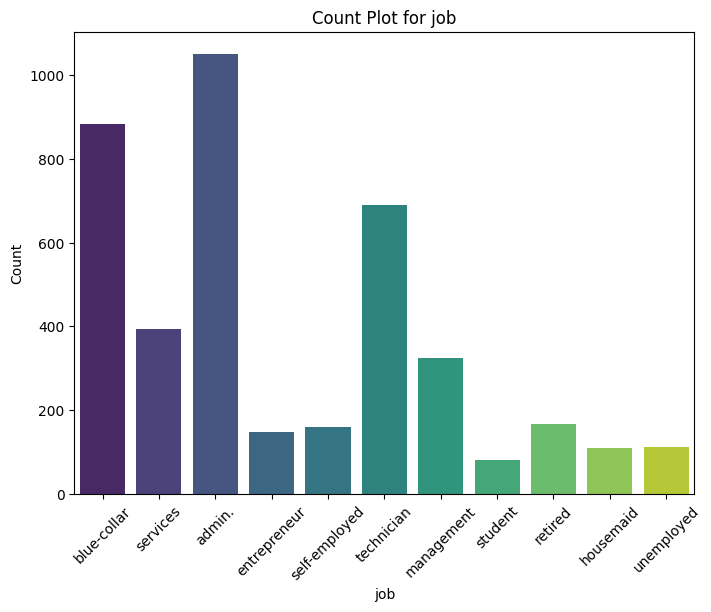

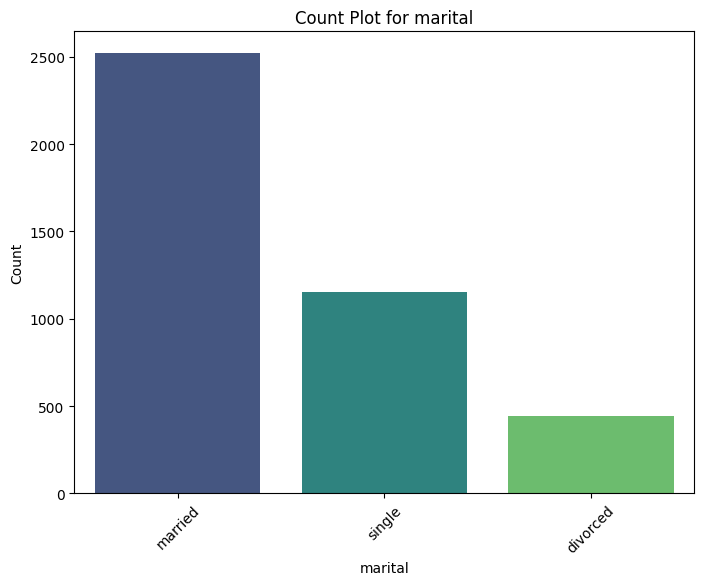

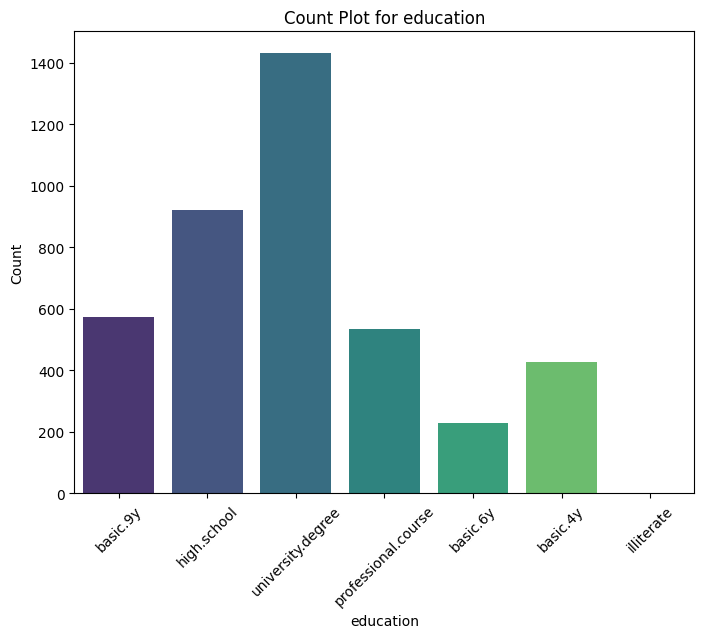

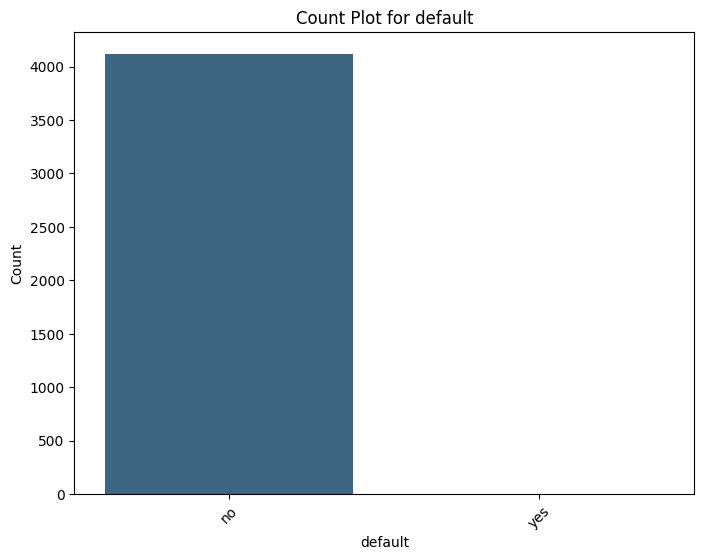

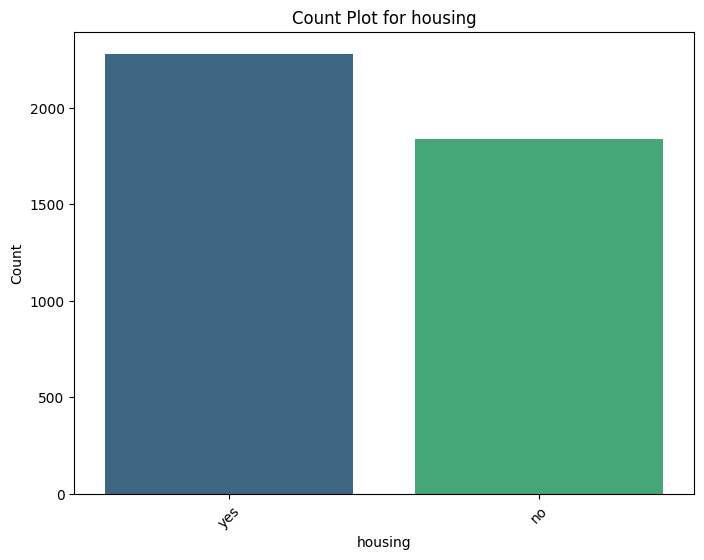

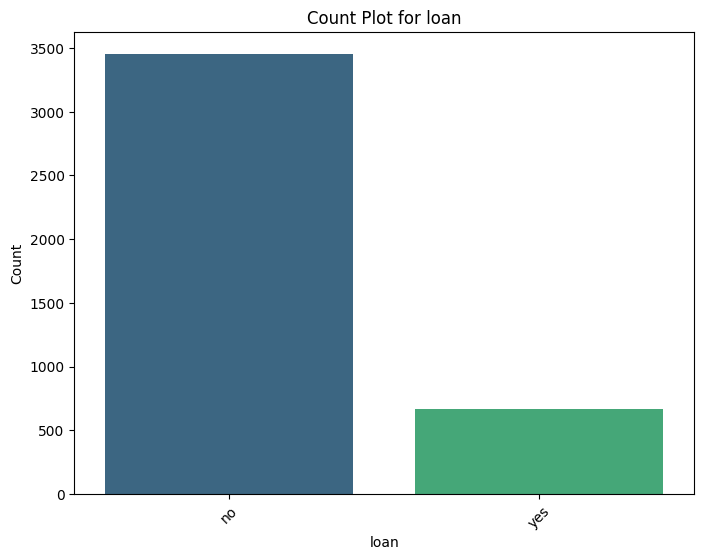

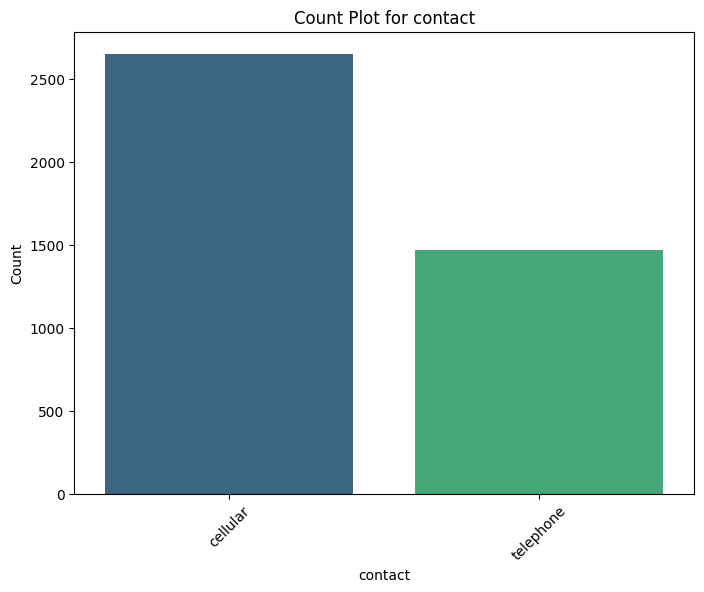

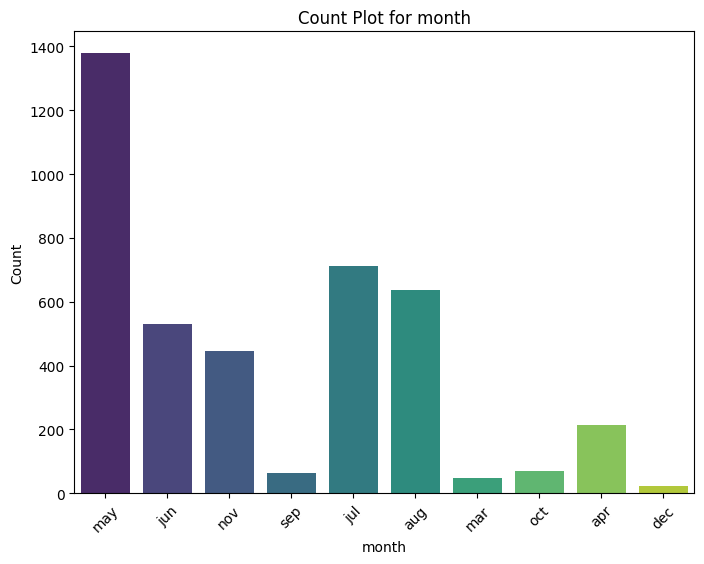

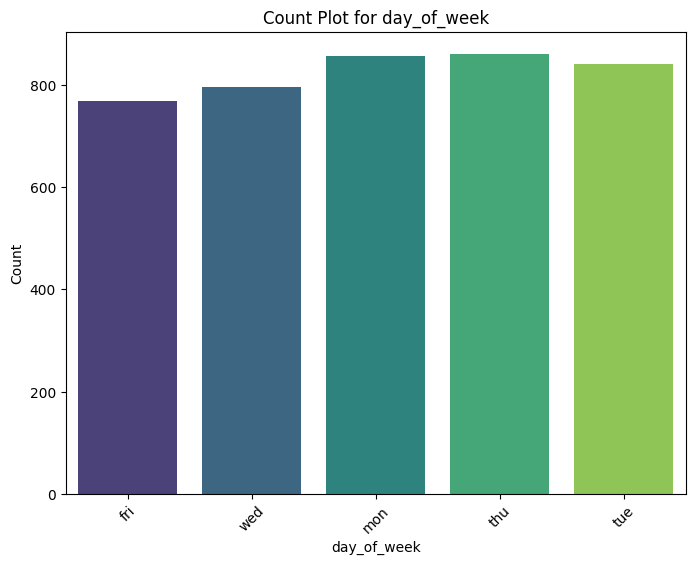

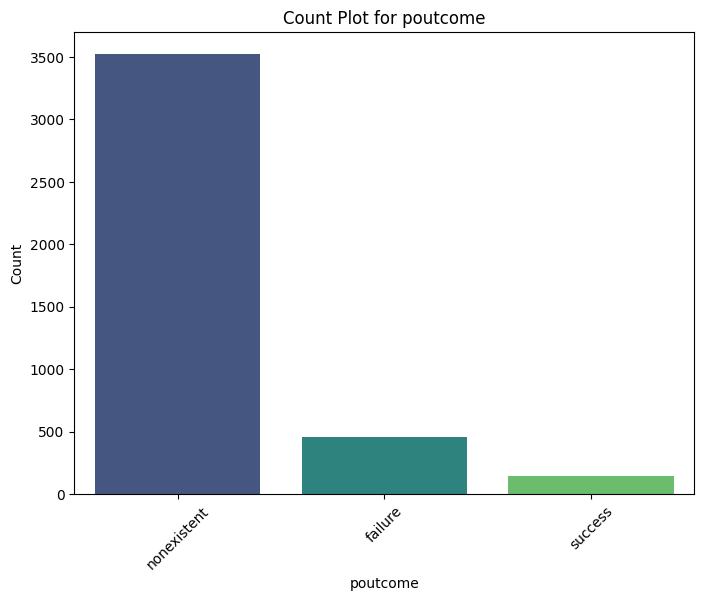

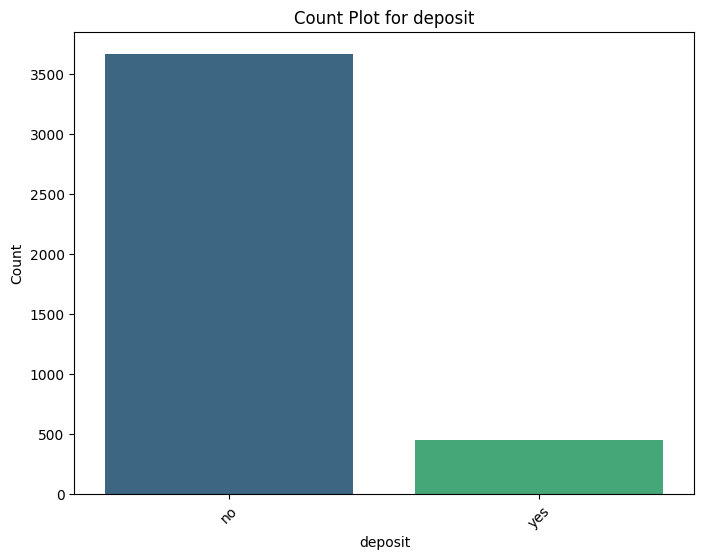

In [44]:
# Print the total number and names of categorical features
print("Total Categorical Features:", categorical_features.shape[0])
print("Categorical Features:", categorical_features)

# Create count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette="viridis")  
    plt.title(f'Count Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

In [45]:
df_transformed['deposit'].unique()

array(['no', 'yes'], dtype=object)

In [46]:
df_transformed.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

_________
## Encoding
_________

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Save the result
data_encoded = df.copy()



In [48]:
data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30.0,1,1,2,0,1,0,0,6,0,...,2.0,999.0,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,...,4.0,999.0,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,1,0,1,4,4,...,1.0,999.0,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,0,1,4,0,...,3.0,999.0,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,1,0,0,7,1,...,1.0,999.0,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30.0,0,1,1,0,1,1,0,3,2,...,1.0,999.0,0.0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39.0,0,1,3,0,1,0,1,3,0,...,1.0,999.0,0.0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27.0,8,2,3,0,0,0,0,6,1,...,2.0,999.0,0.0,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58.0,0,1,3,0,0,0,0,1,0,...,1.0,999.0,0.0,1,1.4,93.444,-36.1,4.966,5228.1,0


In [49]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   int32  
 2   marital         4119 non-null   int32  
 3   education       4119 non-null   int32  
 4   default         4119 non-null   int32  
 5   housing         4119 non-null   int32  
 6   loan            4119 non-null   int32  
 7   contact         4119 non-null   int32  
 8   month           4119 non-null   int32  
 9   day_of_week     4119 non-null   int32  
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   int32  
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [50]:
data_encoded['deposit'] = df_transformed['deposit'].values
data_encoded['deposit'].value_counts()

deposit
no     3668
yes     451
Name: count, dtype: int64

____________
## Resampling
_______

In [51]:
# Step 1: Separate features and target
X = data_encoded.drop(columns=['deposit'], axis=1)
y = data_encoded['deposit']

# Step 2: Choose resampling technique
use_smote = True  # Set to False to use SMOTEENN
if use_smote:
    resampler = SMOTE(random_state=42)
else:
    resampler = SMOTEENN(random_state=42)

# Apply resampling
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Convert to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='deposit')

# Combine features and target (optional)
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled_df.value_counts())

Original class distribution:
 deposit
no     3668
yes     451
Name: count, dtype: int64
Resampled class distribution:
 deposit
no     3668
yes    3668
Name: count, dtype: int64


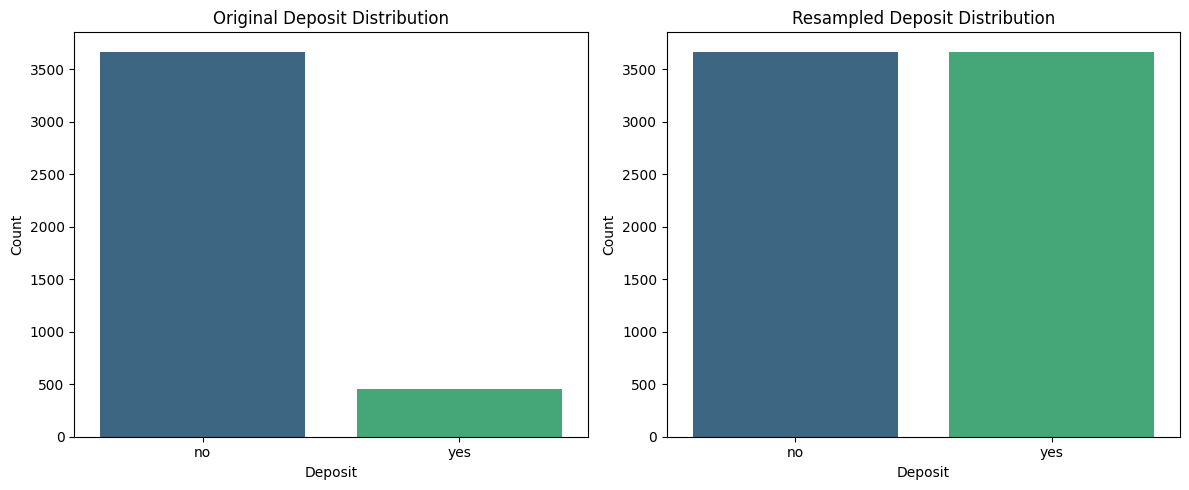

In [52]:
# Plot original vs resampled class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette="viridis", ax=axes[0])
axes[0].set_title("Original Deposit Distribution")
axes[0].set_xlabel("Deposit")
axes[0].set_ylabel("Count")

# Resampled  distribution
sns.barplot(x=y_resampled_df.value_counts().index, y=y_resampled_df.value_counts().values, palette="viridis", ax=axes[1])
axes[1].set_title("Resampled Deposit Distribution")
axes[1].set_xlabel("Deposit")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [53]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             7336 non-null   float64
 1   job             7336 non-null   int32  
 2   marital         7336 non-null   int32  
 3   education       7336 non-null   int32  
 4   default         7336 non-null   int32  
 5   housing         7336 non-null   int32  
 6   loan            7336 non-null   int32  
 7   contact         7336 non-null   int32  
 8   month           7336 non-null   int32  
 9   day_of_week     7336 non-null   int32  
 10  duration        7336 non-null   float64
 11  campaign        7336 non-null   float64
 12  pdays           7336 non-null   float64
 13  previous        7336 non-null   float64
 14  poutcome        7336 non-null   int32  
 15  emp.var.rate    7336 non-null   float64
 16  cons.price.idx  7336 non-null   float64
 17  cons.conf.idx   7336 non-null   f

In [54]:
x = df_resampled.drop('deposit',axis=1)  # independent variable
y = df_resampled['deposit']              # dependent variable
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(7336, 20)
(7336,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


_______
# **Train/Test Split**
__________

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5502, 20)
(1834, 20)
(5502,)
(1834,)


_____
# Model Training
________

In [56]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

________
# Decision Tree Model
_______

In [57]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [58]:
mscore(dt)

Training Score 0.910577971646674
Testing Score 0.9127589967284624


In [59]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

['yes' 'yes' 'no' ... 'no' 'yes' 'yes']


_______
# Evaluation
________

In [60]:
# Evaluate the model
eval_model(y_test, ypred_dt)
mscore(dt)

Accuracy_Score 0.9127589967284624
Confusion Matrix
 [[835  79]
 [ 81 839]]
Classification Report
               precision    recall  f1-score   support

          no       0.91      0.91      0.91       914
         yes       0.91      0.91      0.91       920

    accuracy                           0.91      1834
   macro avg       0.91      0.91      0.91      1834
weighted avg       0.91      0.91      0.91      1834

Training Score 0.910577971646674
Testing Score 0.9127589967284624


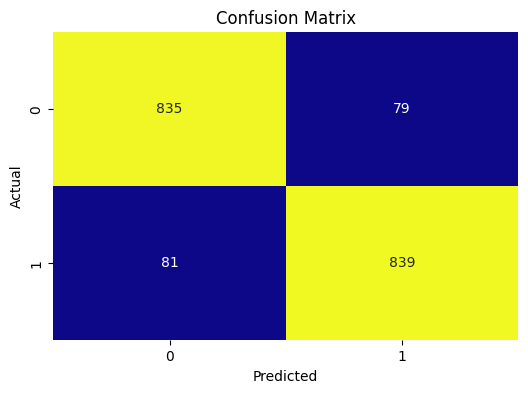

In [61]:
cm = confusion_matrix(y_test, ypred_dt)
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

__________
# Decision Tree Visualization
____

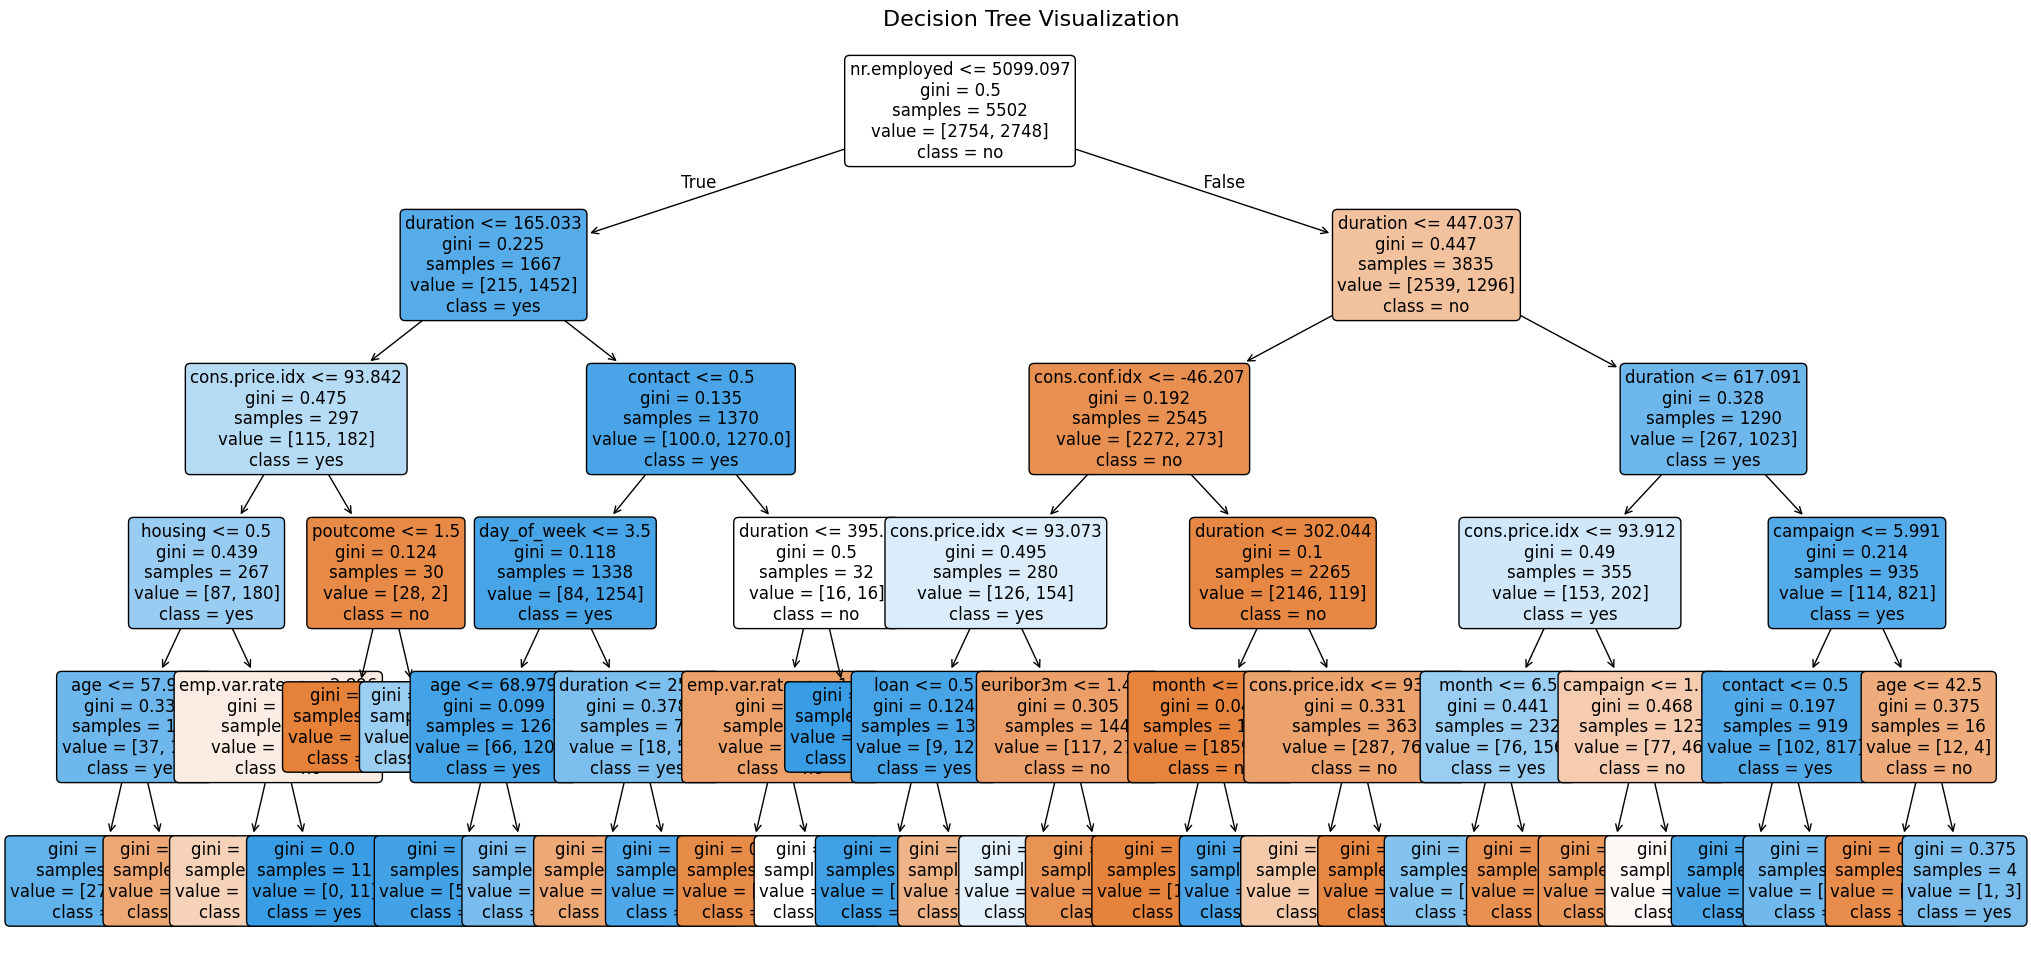

In [62]:
# Define class names and feature names
cn = ['no', 'yes']
fn = x_train.columns

# plot
plt.figure(figsize=(25, 12))
plot_tree(
    dt,
    feature_names=fn,
    class_names=cn,
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=True,  # Shows Gini or entropy score in each node
    proportion=False  # Shows sample counts instead of proportions
)
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()